In [206]:
#PROJE 2 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import time
from warnings import filterwarnings
filterwarnings("ignore")

df = pd.read_csv('NetflixOriginals.csv')
df.describe()
df.isna().any()

Title         False
Genre         False
Premiere      False
Runtime       False
IMDB Score    False
Language      False
dtype: bool

In [232]:
#Premiere kolonundaki tarih yazımının düzenlenmesi gerekmektedir.
#Önce Premiere kolonunda farklı formatta tarihler için düzenleme yapılmış sonrasında da Date & Time formatına uygun olacak şekilde çevrim yapılmıştır.
#Düzenleme sonrası NewDate ve Year kolonları oluşturulmuştur.

df2 = df.copy()
df2["Premiere"]= df2["Premiere"].apply(lambda x: x.replace(".", ","))
df2["NewDate"] = df2["Premiere"].apply(lambda x: datetime.strptime(x, "%B %d, %Y"))
df2["Year"] = pd.DatetimeIndex(df2["NewDate"]).year
df2

,Title,Genre,Premiere,Runtime,IMDB Score,Language,NewDate,Year
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese,2019-08-05,2019
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish,2020-08-21,2020
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian,2019-12-26,2019
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English,2018-01-19,2018
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi,2020-10-30,2020
...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English,2018-12-31,2018
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian,2015-10-09,2015
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English,2018-12-16,2018
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese,2020-12-08,2020


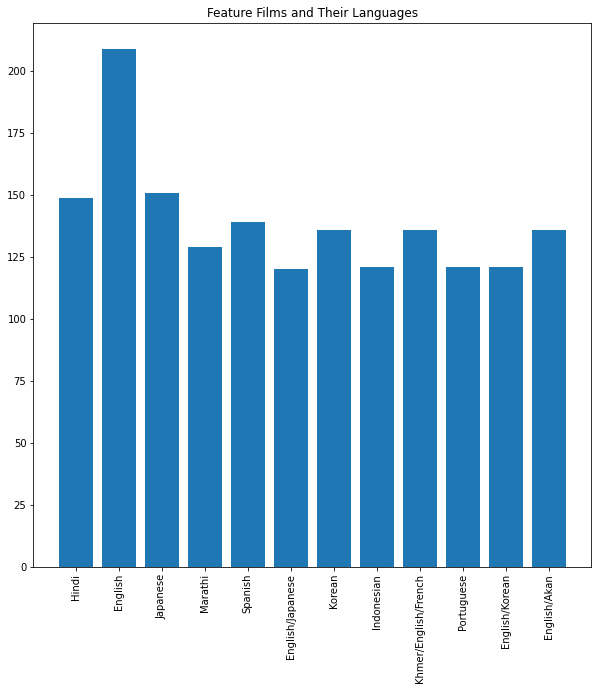

In [230]:
#SORU 1:Veri setine göre uzun soluklu filmler hangi dilde oluşturulmuştur? Görselleştirme yapınız.

FeatureFilm = df2.loc[df2["Runtime"] >= 120]
FeatureFilm = FeatureFilm.drop(["Title", "Genre", "Premiere", "IMDB Score", "NewDate", "Year"], axis = 1)
plt.figure(figsize = (10,10))
plt.bar(FeatureFilm["Language"], FeatureFilm["Runtime"])
plt.title("Feature Films and Their Languages")
plt.xticks(rotation = 90)
plt.show()


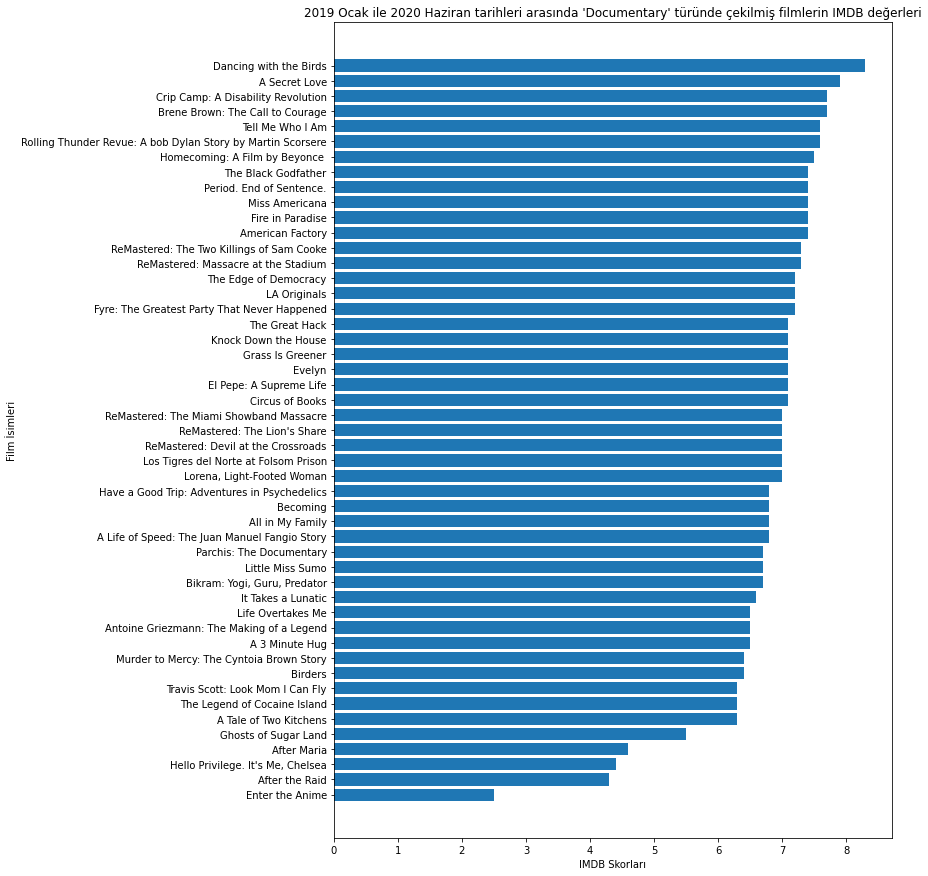

In [231]:
#SORU 2: 2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerlerini bulup görselleştiriniz.

start_date = '2019-01-01'
end_date = '2020-06-01'

int_date = (df2["NewDate"] > start_date) & (df2["NewDate"] <= end_date)
df3 = df2.loc[int_date]
df3 = df3.loc[df3["Genre"] == "Documentary"]
plt.figure(figsize = (10,15))
plt.barh(df3["Title"], df3["IMDB Score"])
plt.title("2019 Ocak ile 2020 Haziran tarihleri arasında 'Documentary' türünde çekilmiş filmlerin IMDB değerleri")
plt.xlabel("IMDB Skorları")
plt.ylabel("Film İsimleri")
plt.show()

In [5]:
#SORU 3: İngilizce çekilen filmler içerisinde hangi tür en yüksek IMDB puanına sahiptir?

EngMovie = df2.loc[df2["Language"] == "English"]
maxScore = EngMovie["IMDB Score"].max()
Mov = EngMovie.loc[EngMovie["IMDB Score"] == maxScore, ["Title"]]
print("İngilizce çekilen filmler içerisinde en yüksek IMDB puanına sahip film türü:", Mov["Title"].to_string(index = False))

İngilizce çekilen filmler içerisinde en yüksek IMDB puanına sahip film türü: David Attenborough: A Life on Our Planet


In [47]:
#SORU 4: 'Hindi' Dilinde çekilmiş olan filmlerin ortalama 'runtime' suresi nedir?

AvgLang = df2.groupby(["Language"]).mean()
AvgRunTime = AvgLang.loc["Hindi", "Runtime"]
print("Average Run Time for Movies in Hindi:", round(AvgRunTime), "minutes")

Average Run Time for Movies in Hindi: 116 minutes


Genre sütunu 115 adet kategoriye sahiptir.


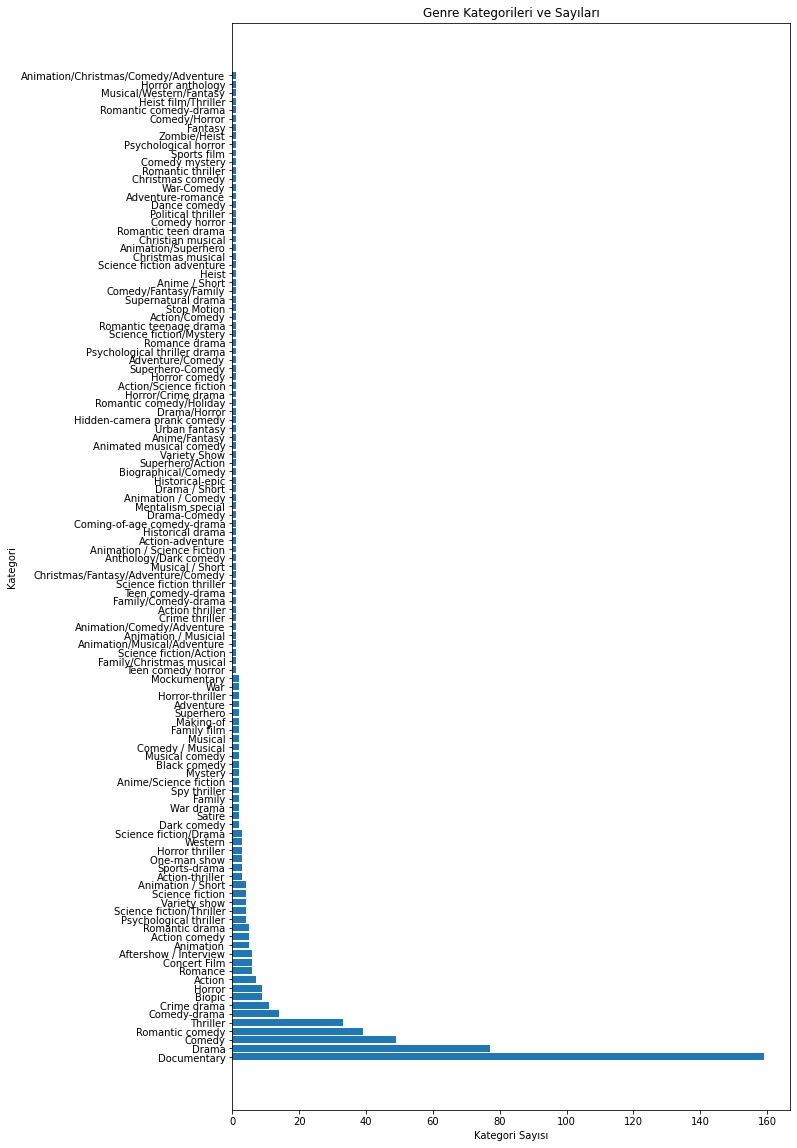

In [267]:
#SORU 5: 'Genre' Sütunu kaç kategoriye sahiptir ve bu kategoriler nelerdir? Görselleştirerek ifade ediniz.
Categorydf = df2["Genre"].value_counts().reset_index().rename(columns = {'index':'Genre Categories', 'Genre':'Number'})
print("Genre sütunu", Categorydf.shape[0], "adet kategoriye sahiptir.")

plt.figure(figsize = (10,20))
plt.barh(Categorydf["Genre Categories"], Categorydf["Number"])
plt.title("Genre Kategorileri ve Sayıları")
plt.xlabel("Kategori Sayısı")
plt.ylabel("Kategori")
plt.show()

Veri setinde bulunan filmlerde en çok kullanılan 3 dil:
English
  Hindi
Spanish


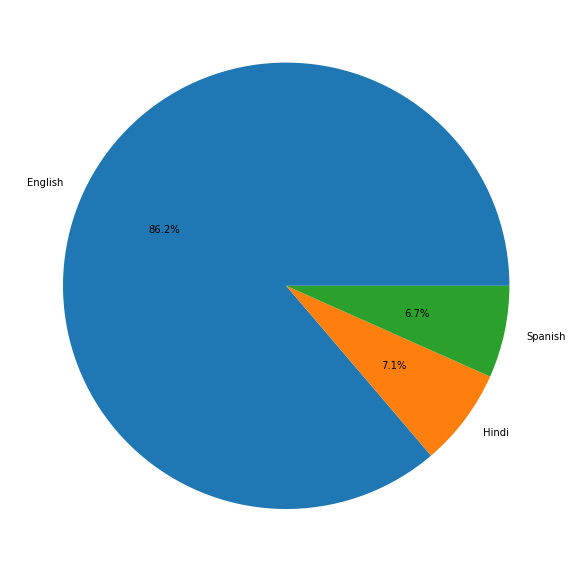

In [250]:
#SORU 6: Veri setinde bulunan filmlerde en çok kullanılan 3 dili bulunuz.

topLang= df2["Language"].value_counts().head(3).reset_index().rename(columns = {'index':'Languages', 'Language':'Number'})
print("Veri setinde bulunan filmlerde en çok kullanılan 3 dil:")
print(topLang["Languages"].to_string(index = False))

plt.figure(figsize = (10,15))
plt.pie(topLang["Number"], labels = topLang["Languages"], autopct='%1.1f%%')
plt.show()

In [242]:
#SORU 7: IMDB puanı en yüksek olan ilk 10 film hangileridir?

TopTen = df2.groupby("Title").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
print(TopTen)

                                         Title  IMDB Score
0     David Attenborough: A Life on Our Planet         9.0
1    Emicida: AmarElo - It's All For Yesterday         8.6
2                      Springsteen on Broadway         8.5
3   Ben Platt: Live from Radio City Music Hall         8.4
4        Taylor Swift: Reputation Stadium Tour         8.4
5  Winter on Fire: Ukraine's Fight for Freedom         8.4
6                      Cuba and the Cameraman          8.3
7                       Dancing with the Birds         8.3
8        The Three Deaths of Marisela Escobedo         8.2
9                                   Seaspiracy         8.2


            IMDB Score   Runtime
IMDB Score    1.000000 -0.040896
Runtime      -0.040896  1.000000


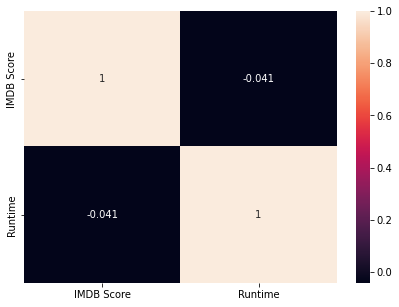

In [16]:
#SORU 8: IMDB puanı ile 'Runtime' arasında nasıl bir korelasyon vardır? İnceleyip görselleştiriniz.

df3 = df2.loc[:,["IMDB Score", "Runtime"]]
correlation = df3.corr()
print(correlation)
plt.figure(figsize = (7,5))
sns.heatmap(correlation, annot = True)
plt.show()

#Korelasyon değerinin çok küçük olması IMDB puanı ile Runtime arasındaki ilişkinin zayıf olduğunu gösteriyor.


In [243]:
#SORU 9: IMDB Puanı en yüksek olan ilk 10 'Genre' hangileridir? Görselleştiriniz.

IMDBGenre = df2.groupby("Genre").agg({"IMDB Score": "max"}).sort_values(by="IMDB Score", ascending=False)[0:10].reset_index()
print(IMDBGenre)


                                  Genre  IMDB Score
0                           Documentary         9.0
1                          One-man show         8.5
2                          Concert Film         8.4
3  Animation/Christmas/Comedy/Adventure         8.2
4                                 Drama         7.9
5                     Animation / Short         7.8
6                           Crime drama         7.8
7                       Musical / Short         7.7
8                             Making-of         7.7
9                             War drama         7.7


In [27]:
#SORU 10: 'Runtime' değeri en yüksek olan ilk 10 film hangileridir? Görselleştiriniz.

topRuntime = df2.loc[:, ["Runtime", "Title"]].sort_values(by = ["Runtime"], ascending = False).head(10).reset_index(drop = True)
print(topRuntime)


   Runtime                            Title
0      209                     The Irishman
1      155                      Da 5 Bloods
2      153          Springsteen on Broadway
3      151                         Citation
4      151               The Forest of Love
5      149                   Raat Akeli Hai
6      149  The Last Days of American Crime
7      149                             Ludo
8      148                 Army of the Dead
9      147                            Drive


In [119]:
#SORU 11: Hangi yılda en fazla film yayımlanmıştır? Görselleştiriniz.
print("En fazla film {} yılında yayınlanmıştır.\nYayınlanan Film sayısı: {}"
      .format(df2["Year"].value_counts().idxmax(),df2["Year"].value_counts().max()))


En fazla film 2020 yılında yayınlanmıştır.
Yayınlanan Film sayısı: 183


In [151]:
#SORU 12: Hangi dilde yayımlanan filmler en düşük ortalama IMBD puanına sahiptir? Görselleştiriniz.
LowScore = df2.groupby("Language").agg({"IMDB Score": "mean"}).sort_values(by="IMDB Score", ascending=True).head(1).reset_index()
print("En düşük ortalama IMBD puanına sahip dil", LowScore["Language"].to_string(index = False), "olup ortalama", LowScore["IMDB Score"].to_string(index = False), "IMDB puanına sahiptir.")

En düşük ortalama IMBD puanına sahip dil Malay olup ortalama 4.2 IMDB puanına sahiptir.


In [181]:
#SORU 13: Hangi yılın toplam "runtime" süresi en fazladır?
MaxRuntime = df2.groupby("Year").sum().sort_values(by="Runtime", ascending=True).head(1).reset_index().drop("IMDB Score", axis=1)
print("Toplam Runtime süresi en fazla olan yıl:", MaxRuntime["Year"].to_string(index = False),", Runtime süresi:",MaxRuntime["Runtime"].to_string(index = False))

Toplam Runtime süresi en fazla olan yıl: 2014 , Runtime süresi: 81


In [170]:
#SORU 14: Her bir dilin en fazla kullanıldığı "Genre" nedir?
df4 = df2.groupby(["Language"])["Genre"].value_counts().groupby(level = "Language").head(1).sort_values(ascending = False)
print(df4)


Language                    Genre                
English                     Documentary              120
Hindi                       Drama                     13
Spanish                     Documentary                8
French                      Documentary                6
Portuguese                  Comedy                     6
English/Spanish             Documentary                5
Italian                     Drama                      4
Indonesian                  Drama                      3
Marathi                     Drama                      2
Korean                      Drama                      2
Japanese                    Anime/Science fiction      2
Turkish                     Comedy                     2
English/Hindi               Documentary                2
English/Mandarin            Documentary                2
Norwegian                   Horror                     1
Thia/English                Documentary                1
Thai                        Documentar

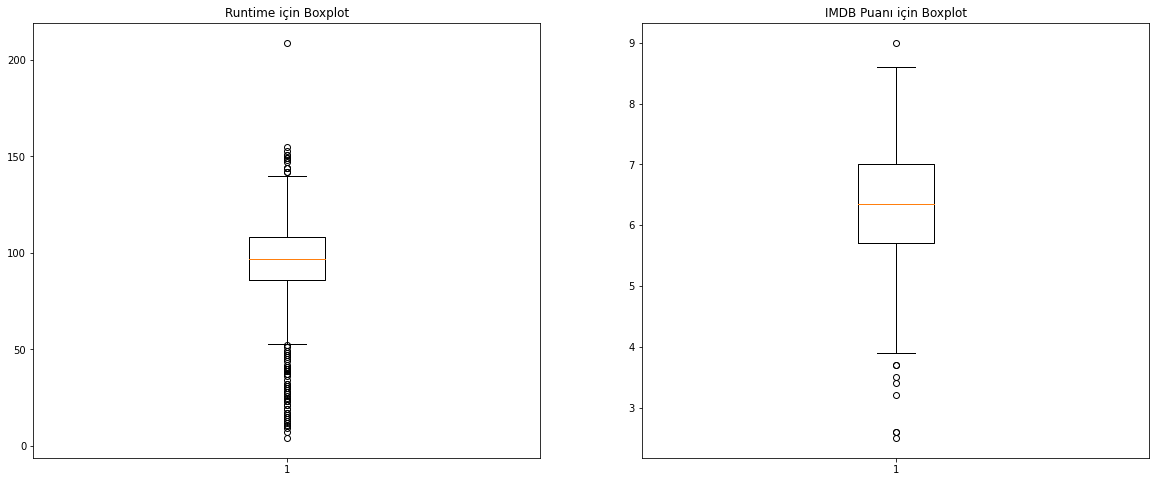

In [199]:
# SORU 15: Veri setinde outlier veri var mıdır? Açıklayınız.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 8))
ax1.boxplot(df2["Runtime"])
ax1.set_title("Runtime için Boxplot")

ax2.boxplot(df2["IMDB Score"])
ax2.set_title("IMDB Puanı için Boxplot")
plt.show()

# Runtime ve IMDB Puanları için outlier veri mevcuttur. Outlier veri aşağıdaki grafiklerde yuvarlak ile gösterilmiştir.



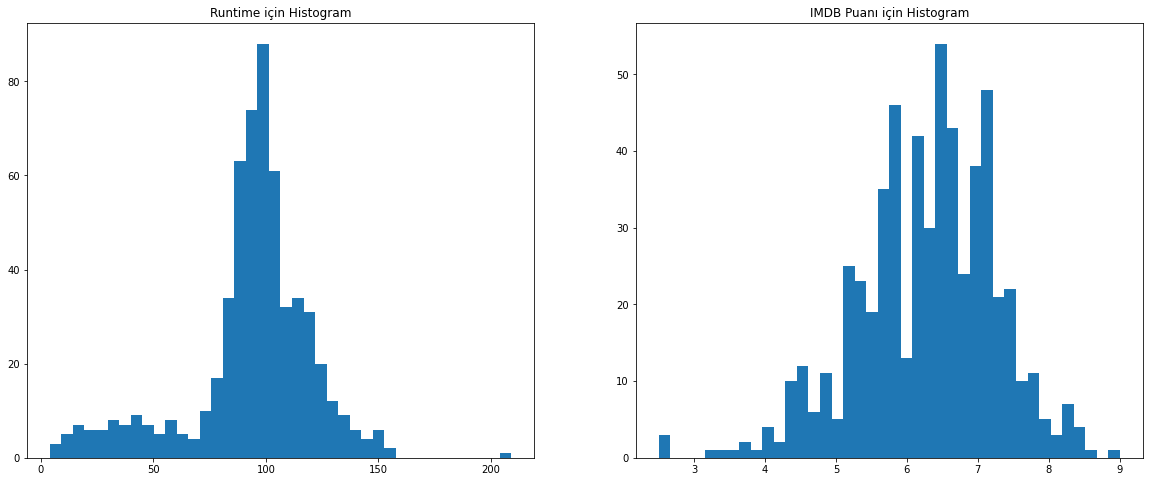

In [205]:
#SORU 15: Devamında Histogram da eklenerek Outlier değerlerin görselleştirilmiştir.

fig, (ax3, ax4) = plt.subplots(1, 2, figsize = (20, 8))

ax3.hist(df2["Runtime"], bins=40)
ax3.set_title("Runtime için Histogram")

ax4.hist(df2["IMDB Score"], bins=40)
ax4.set_title("IMDB Puanı için Histogram")

plt.show()

